Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting. Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient.

Assignment
----------

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric bicycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric bicycles in the Indian market.

The company wants to know:

-   Which variables are significant in predicting the demand for shared electric bicycles in the Indian market?
-   How well do those variables describe the electric bicycle demand.

Data Description
----------------

The file `bike_sharing.csv` contains the usage data aggregated by the hour with the following columns:

-   `datetime` - beginning of an hour for which the data are aggregated;
-   `season`
    -   1: spring,
    -   2: summer,
    -   3: fall,
    -   4: winter;
-   `holiday` - whether a day is a holiday or not
-   `workingday` - if a day is neither weekend nor holiday is 1, otherwise is 0.
-   `weather`
    -   1: clear, few clouds, scattered clouds
    -   2: mist + cloudy, mist + scattered clouds, mist + few clouds, mist
    -   3: light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds
    -   4: heavy rain + ice pallets + thunderstorm + mist, snow + fog
-   `temp` - air temperature in degrees Celsius
-   `atemp` - feeling temperature in degrees Celsius
-   `humidity` - air humidity in percent
-   `windspeed` - wind speed in km/h
-   `casual` - number of bikes rented by casual users
-   `registered` - number of bikes rented by registered users
-   `count` - total number of rented bikes including both casual and registered users

Practicalities
--------------

Analyze the provided data and provide insights to the best of your abilities. Use statistical tests to support your claims. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")


In [3]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Data Preparation and Cleaning

In [6]:
df.isna().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
# Convert to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])


In [8]:
min_datetime = df['datetime'].min()
max_datetime = df['datetime'].max()

print("Minimum Date and Time:", min_datetime)
print("Maximum Date and Time:", max_datetime)

Minimum Date and Time: 2011-01-01 00:00:00
Maximum Date and Time: 2012-12-19 23:00:00


In [9]:
# Extract year, month, day, and hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

# Now, you have the 'year', 'month', 'day', and 'hour' columns in your DataFrame
print(df[['year', 'month', 'day', 'hour']])


       year  month  day  hour
0      2011      1    1     0
1      2011      1    1     1
2      2011      1    1     2
3      2011      1    1     3
4      2011      1    1     4
...     ...    ...  ...   ...
10881  2012     12   19    19
10882  2012     12   19    20
10883  2012     12   19    21
10884  2012     12   19    22
10885  2012     12   19    23

[10886 rows x 4 columns]


### EDA

- Binary
    - `holiday`
    - `workingday`
- Nominal 
- Ordinal 
    - `season`
    - `weather`
- Continuous
    - `temp`
    - `atemp`
    - `humidity`
    - `windspeed`
- Discrete
    - `casual`
    - `registered`
    - `count`

In [10]:
statistics = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].describe()

print(statistics)

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [11]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### Total count of rented bikes over time 

In [12]:
df.set_index('datetime', inplace=True)


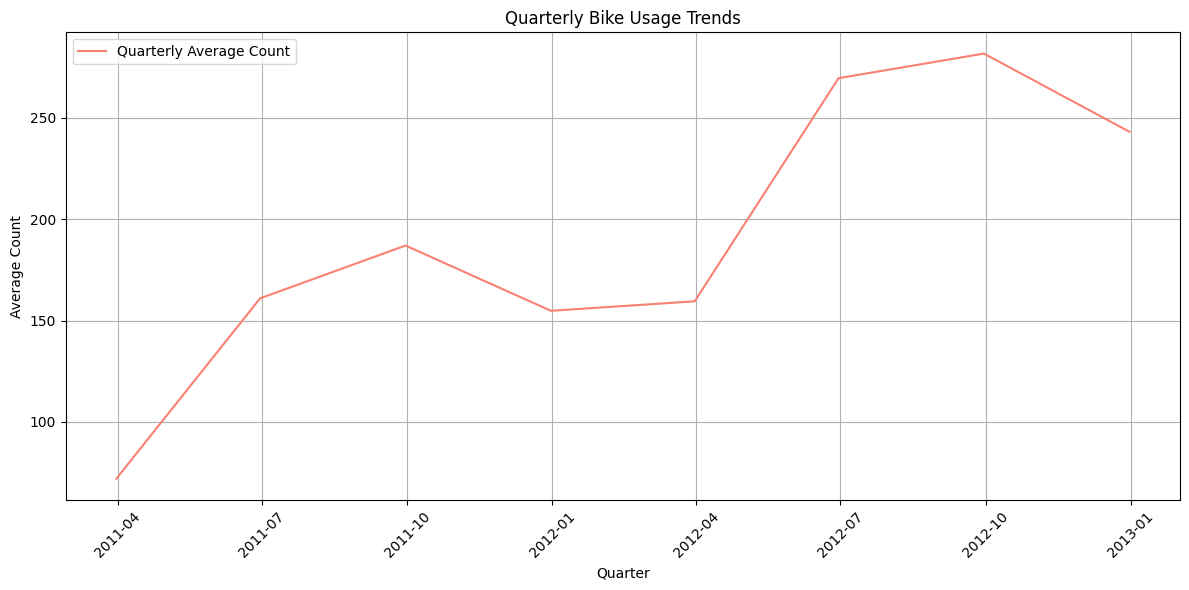

In [13]:
# Group data by quarter and calculate the average count of rented bikes for each quarter
quarterly_avg_counts = df.resample('Q')['count'].mean()

# Create a line plot to visualize quarterly trends
plt.figure(figsize=(12, 6))
plt.plot(quarterly_avg_counts.index, quarterly_avg_counts, color='salmon', label='Quarterly Average Count')
plt.title('Quarterly Bike Usage Trends')
plt.xlabel('Quarter')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


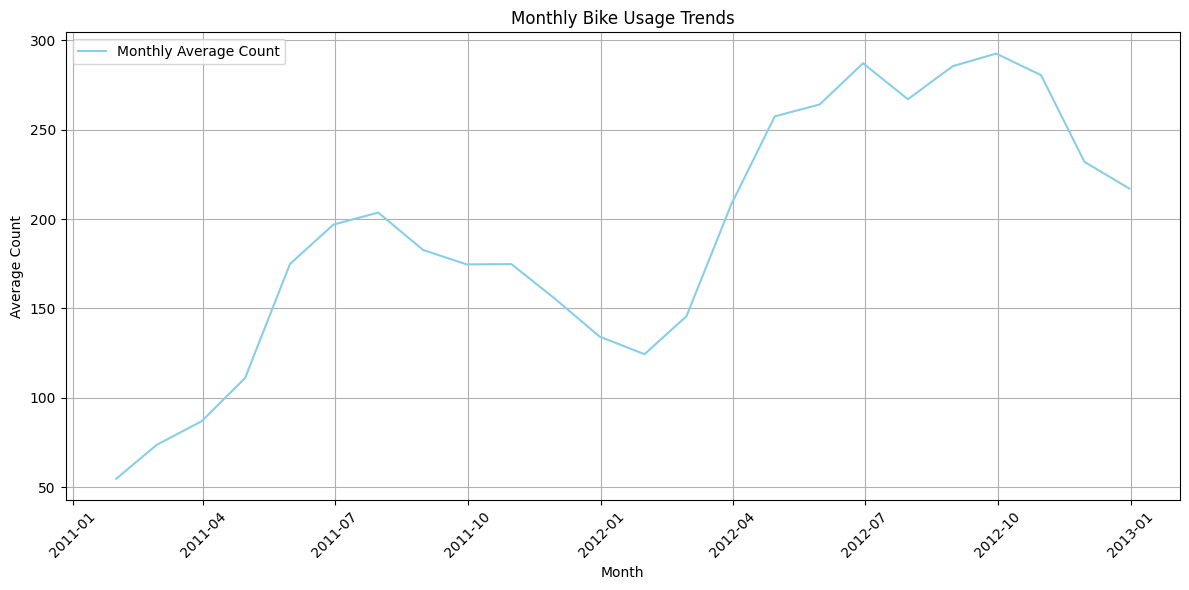

In [14]:
# Group data by month and calculate the average count of rented bikes for each month
monthly_avg_counts = df.resample('M')['count'].mean()

# Create a line plot to visualize monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_counts.index, monthly_avg_counts, color='skyblue', label='Monthly Average Count')
plt.title('Monthly Bike Usage Trends')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Filter data for the year 2011 and 2012 separately
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]

# Group data by month and calculate total counts for each year
monthly_counts_2011 = df_2011.groupby('month')['count'].sum()
monthly_counts_2012 = df_2012.groupby('month')['count'].sum()

# Calculate the percent change between the same months in 2011 and 2012
percent_change = ((monthly_counts_2012 - monthly_counts_2011) / monthly_counts_2011) * 100

# Create a DataFrame to display the results
comparison_df = pd.DataFrame({
    'Month': percent_change.index,
    'Percent Change': percent_change
})

# Display the DataFrame
print(comparison_df)


       Month  Percent Change
month                       
1          1      139.181386
2          2      101.768968
3          3      144.652123
4          4      131.377556
5          5       51.084516
6          6       45.870834
7          7       31.148759
8          8       56.334038
9          9       68.670358
10        10       60.851085
11        11       48.896162
12        12       61.772061


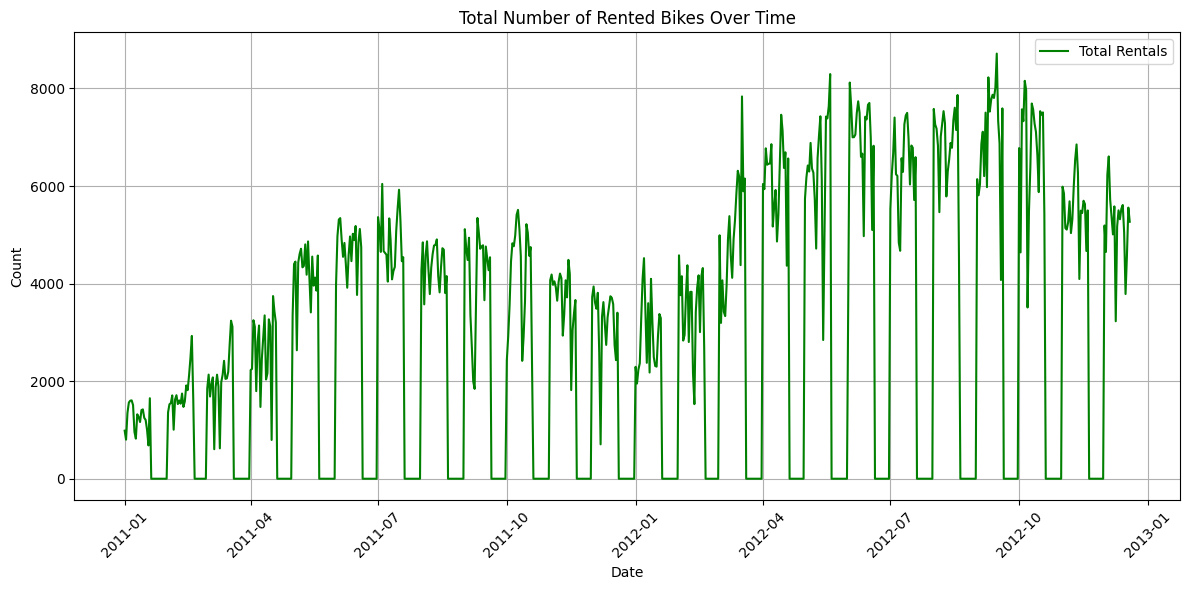

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.resample('D').sum().index, df.resample('D').sum()['count'], color='green', label='Total Rentals')  # Assuming 'df' is your DataFrame and it's resampled by day
plt.title('Total Number of Rented Bikes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



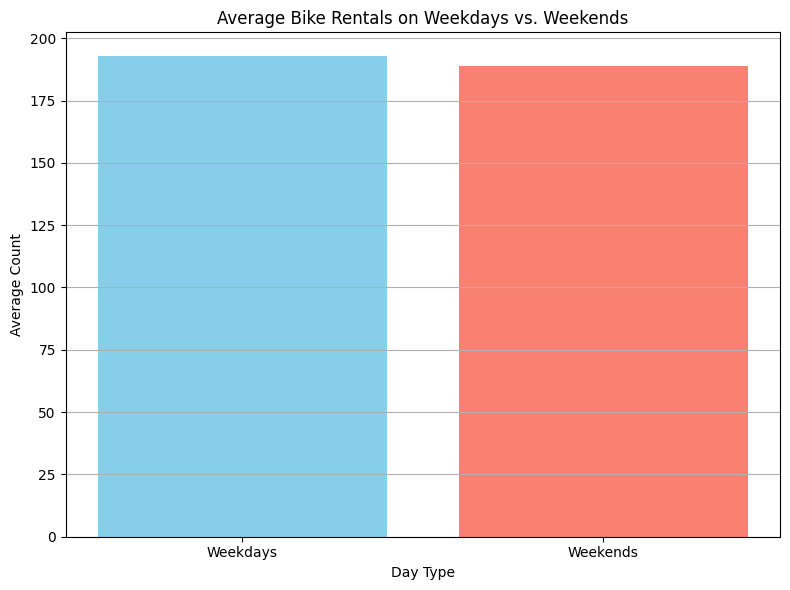

In [17]:
# Group data by day of the week and calculate the average count of rented bikes for each day
day_of_week = df.index.dayofweek

# Create a new column 'Weekday' to indicate whether each day is a weekday (1) or weekend (0)
df['Weekday'] = (day_of_week < 5).astype(int)

# Group data by weekdays and weekends and calculate the average counts
avg_counts_weekdays = df[df['Weekday'] == 1]['count'].mean()
avg_counts_weekends = df[df['Weekday'] == 0]['count'].mean()

# Create a bar chart to visualize bike rentals on weekdays vs. weekends
plt.figure(figsize=(8, 6))
plt.bar(['Weekdays', 'Weekends'], [avg_counts_weekdays, avg_counts_weekends], color=['skyblue', 'salmon'])
plt.title('Average Bike Rentals on Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()




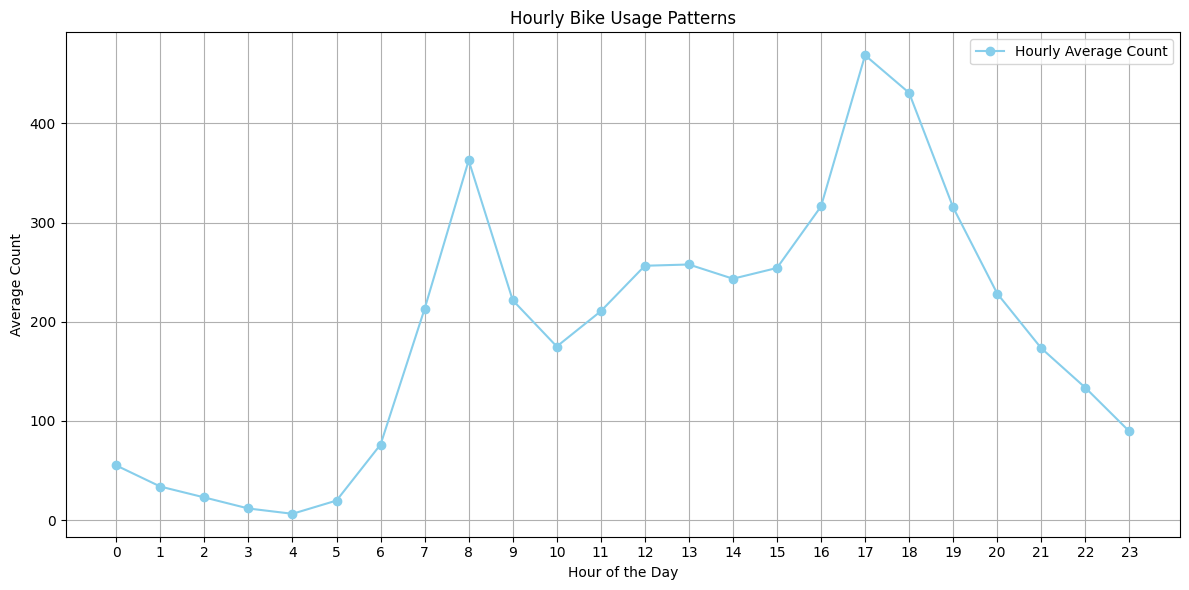

In [18]:
# Group data by hour of the day and calculate the average count of rented bikes for each hour
hourly_avg_counts = df.groupby(df.index.hour)['count'].mean()

# Create a line plot to visualize hourly usage patterns
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_counts.index, hourly_avg_counts, color='skyblue', marker='o', linestyle='-', label='Hourly Average Count')
plt.title('Hourly Bike Usage Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


IndexingError: Too many indexers

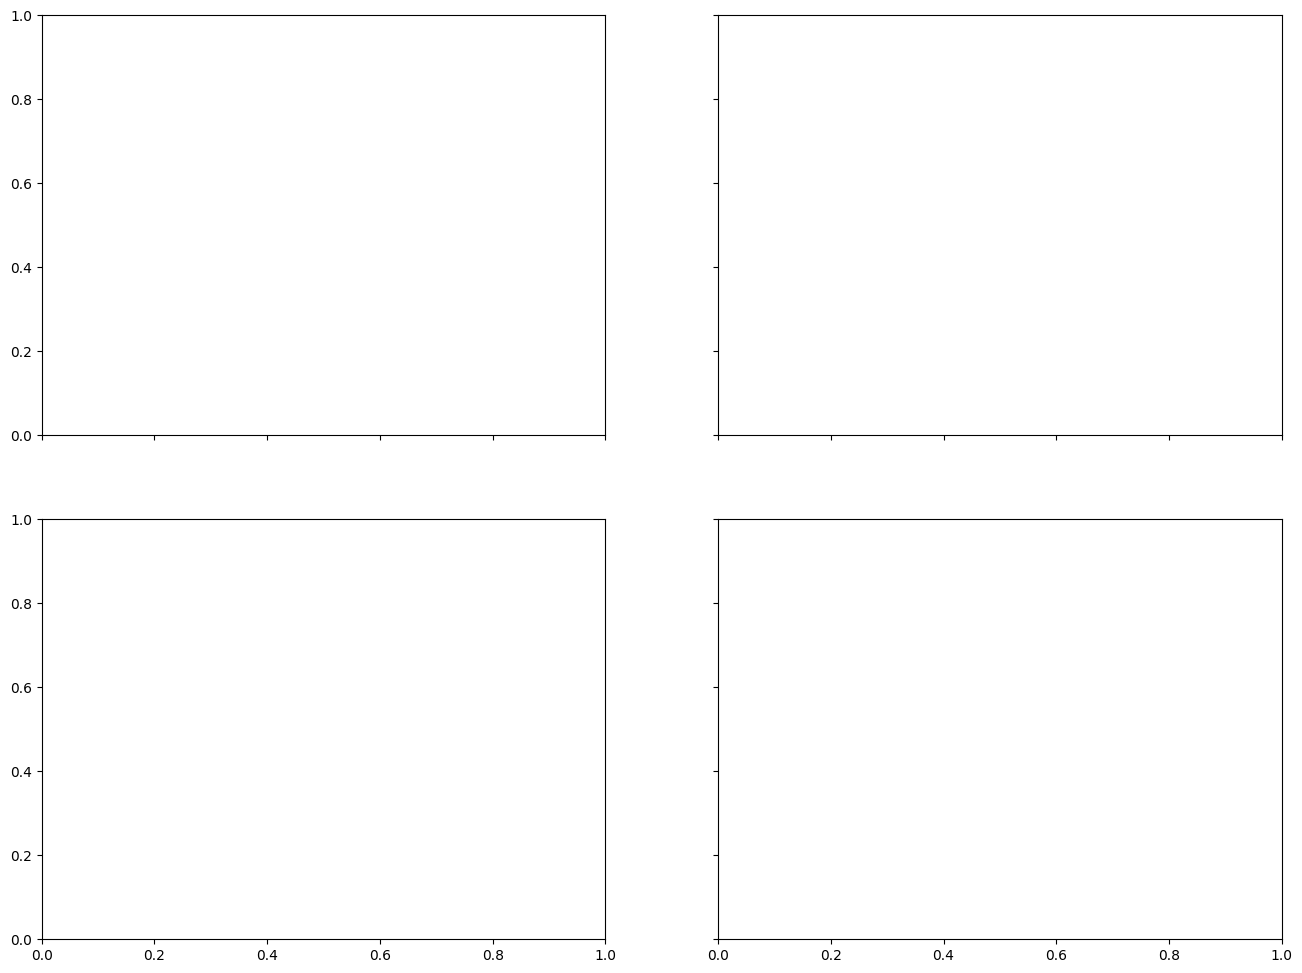

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True, sharey=True)
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
seasons_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}

for i, season in enumerate(range(1, 5), 1):
    ax = axes[(i-1)//2, (i-1)%2]
    for year in df['year'].unique():
        data = hourly_avg_counts.loc[season, year]
        ax.plot(data.index, data.values, label=f'Year {year}')
    ax.set_title(f'Hourly Bike Usage Patterns - {seasons_dict[season]}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Average Count')
    ax.legend(loc='upper left')
    ax.grid(True)

plt.suptitle('Hourly Bike Usage Patterns by Season and Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


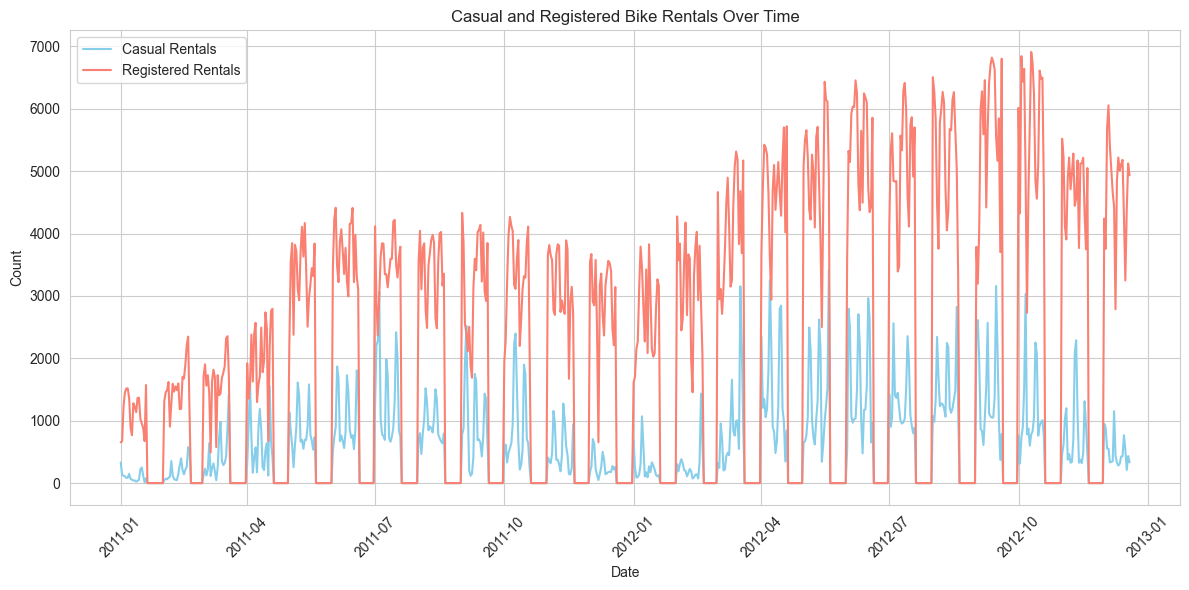

In [ ]:
# Calculate the daily sum of the 'casual' and 'registered' variables
daily_casual = df.resample('D').sum()['casual']
daily_registered = df.resample('D').sum()['registered']

# Create line plots for 'casual' and 'registered' rentals over time
plt.figure(figsize=(12, 6))
plt.plot(daily_casual.index, daily_casual, color='skyblue', label='Casual Rentals')
plt.plot(daily_registered.index, daily_registered, color='salmon', label='Registered Rentals')
plt.title('Casual and Registered Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()



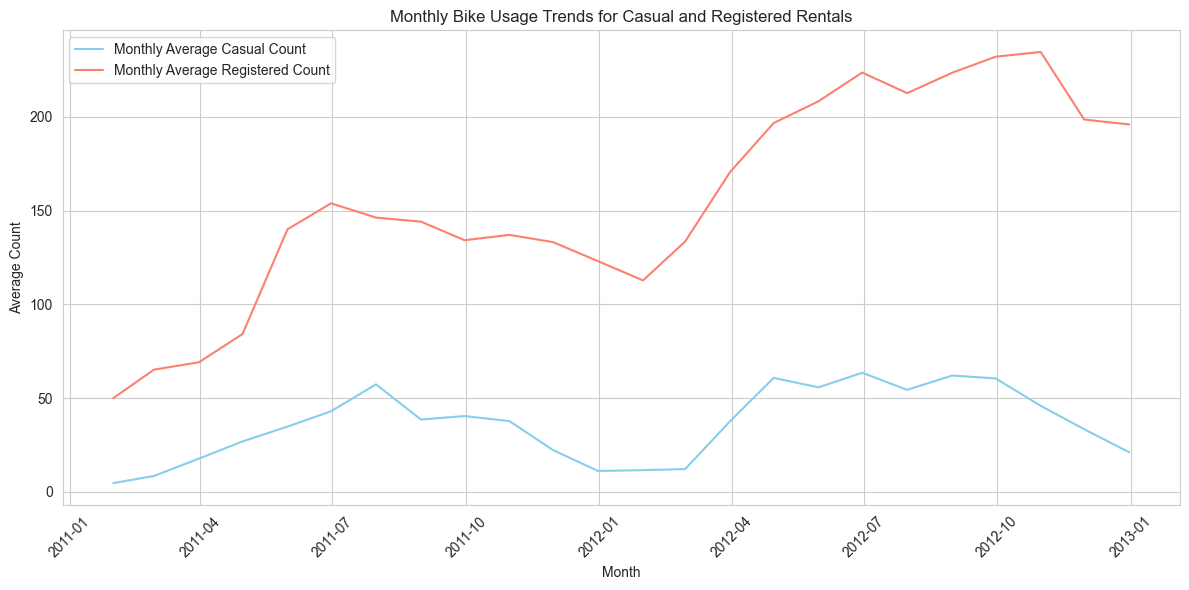

In [ ]:
# Group data by month and calculate the average counts of casual and registered rentals for each month
monthly_avg_casual_counts = df.resample('M')['casual'].mean()
monthly_avg_registered_counts = df.resample('M')['registered'].mean()

# Create a line plot to visualize monthly trends for casual and registered rentals
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_casual_counts.index, monthly_avg_casual_counts, color='skyblue', label='Monthly Average Casual Count')
plt.plot(monthly_avg_registered_counts.index, monthly_avg_registered_counts, color='salmon', label='Monthly Average Registered Count')
plt.title('Monthly Bike Usage Trends for Casual and Registered Rentals')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Group data by month and calculate total counts for each year for casual and registered rentals
monthly_casual_counts_2011 = df_2011.groupby('month')['casual'].sum()
monthly_registered_counts_2011 = df_2011.groupby('month')['registered'].sum()

monthly_casual_counts_2012 = df_2012.groupby('month')['casual'].sum()
monthly_registered_counts_2012 = df_2012.groupby('month')['registered'].sum()

# Calculate the percent change between the same months in 2011 and 2012 for casual and registered rentals
casual_percent_change = ((monthly_casual_counts_2012 - monthly_casual_counts_2011) / monthly_casual_counts_2011) * 100
registered_percent_change = ((monthly_registered_counts_2012 - monthly_registered_counts_2011) / monthly_registered_counts_2011) * 100

# Create DataFrames to display the results
casual_comparison_df = pd.DataFrame({
    'Month': casual_percent_change.index,
    'Casual Percent Change': casual_percent_change
})

registered_comparison_df = pd.DataFrame({
    'Month': registered_percent_change.index,
    'Registered Percent Change': registered_percent_change
})

# Display the DataFrames
print("Casual Rentals:")
print(casual_comparison_df)
print("\nRegistered Rentals:")
print(registered_comparison_df)


Casual Rentals:
       Month  Casual Percent Change
month                              
1          1             161.155378
2          2              46.212924
3          3             116.763590
4          4             125.562188
5          5              60.226915
6          6              47.826531
7          7              -5.136737
8          8              60.921502
9          9              50.674458
10        10              21.965149
11        11              49.660266
12        12              89.427053

Registered Rentals:
       Month  Registered Percent Change
month                                  
1          1                 137.133309
2          2                 108.985826
3          3                 151.808597
4          4                 133.234956
5          5                  48.812805
6          6                  45.324612
7          7                  45.371273
8          8                  55.106823
9          9                  74.090767
10        10       

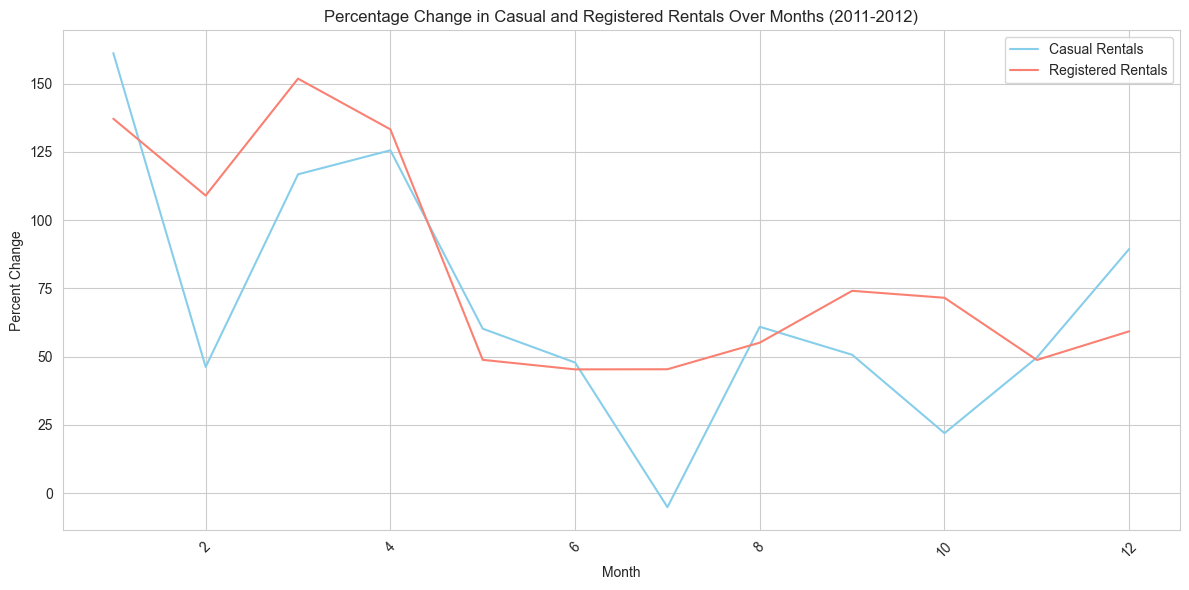

In [ ]:
# Year-over-year Percent Change
plt.figure(figsize=(12, 6))
plt.plot(casual_comparison_df['Month'], casual_comparison_df['Casual Percent Change'], color='skyblue', label='Casual Rentals')
plt.plot(registered_comparison_df['Month'], registered_comparison_df['Registered Percent Change'], color='salmon', label='Registered Rentals')
plt.title('Percentage Change in Casual and Registered Rentals Over Months (2011-2012)')
plt.xlabel('Month')
plt.ylabel('Percent Change')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

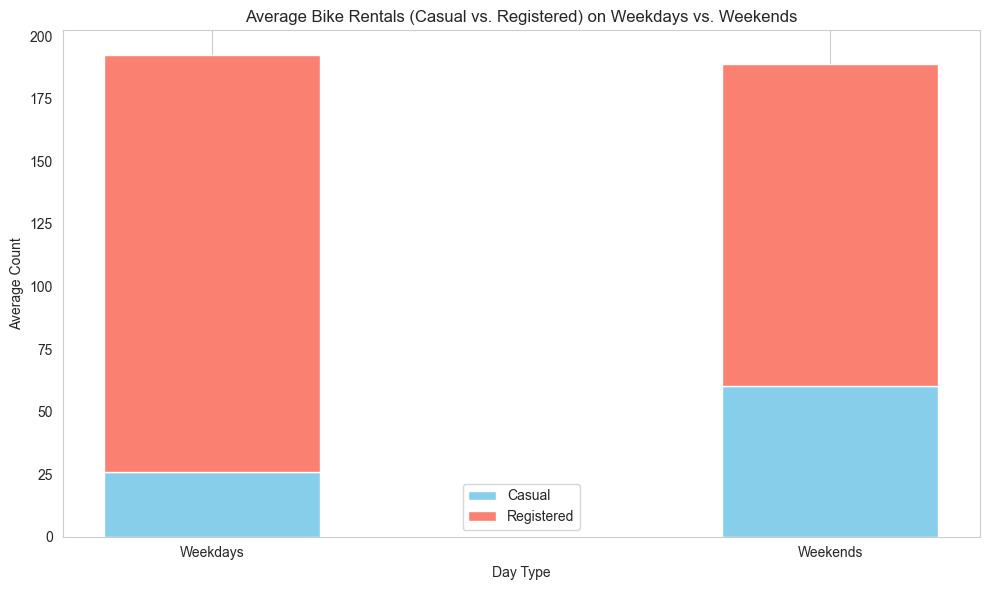

In [ ]:
# Group data by weekdays and weekends and calculate the average counts for casual and registered rentals
avg_casual_weekdays = df[(df['Weekday'] == 1)]['casual'].mean()
avg_registered_weekdays = df[(df['Weekday'] == 1)]['registered'].mean()

avg_casual_weekends = df[(df['Weekday'] == 0)]['casual'].mean()
avg_registered_weekends = df[(df['Weekday'] == 0)]['registered'].mean()

# Create a bar chart to visualize casual and registered bike rentals on weekdays vs. weekends
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = ['Weekdays', 'Weekends']

plt.bar(index, [avg_casual_weekdays, avg_casual_weekends], bar_width, label='Casual', color='skyblue')
plt.bar(index, [avg_registered_weekdays, avg_registered_weekends], bar_width, label='Registered', color='salmon', bottom=[avg_casual_weekdays, avg_casual_weekends])

plt.title('Average Bike Rentals (Casual vs. Registered) on Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Count')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


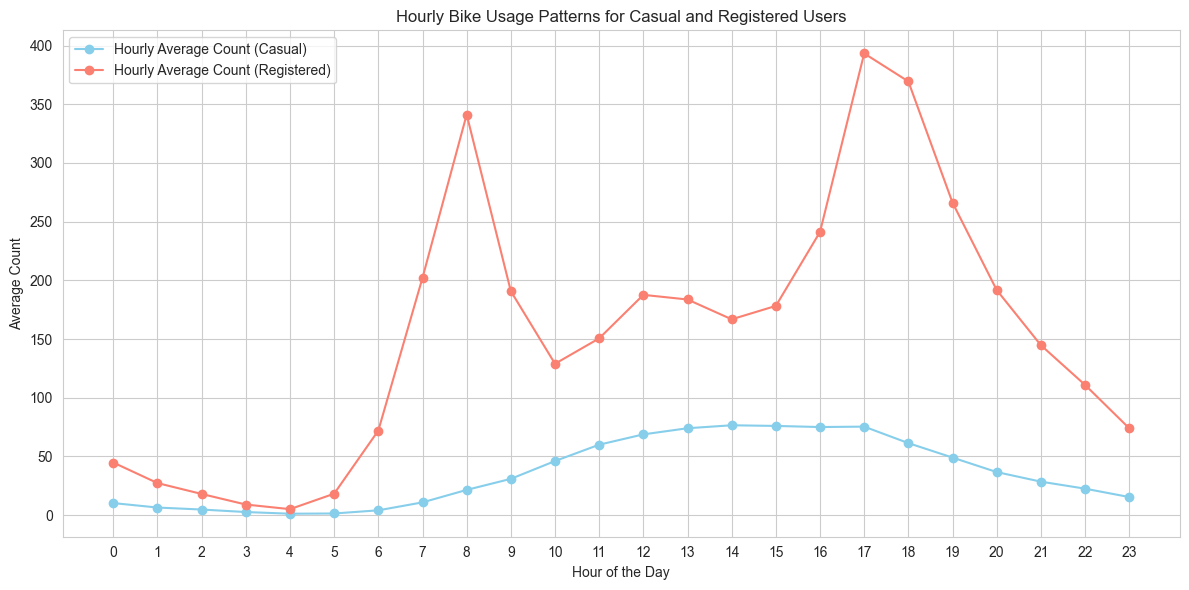

In [ ]:
hourly_avg_casual = df.groupby(df.index.hour)['casual'].mean()
hourly_avg_registered = df.groupby(df.index.hour)['registered'].mean()

# Create a line plot to visualize hourly usage patterns for casual and registered users
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg_casual.index, hourly_avg_casual, color='skyblue', marker='o', linestyle='-', label='Hourly Average Count (Casual)')
plt.plot(hourly_avg_registered.index, hourly_avg_registered, color='salmon', marker='o', linestyle='-', label='Hourly Average Count (Registered)')
plt.title('Hourly Bike Usage Patterns for Casual and Registered Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Holiday, Working Days

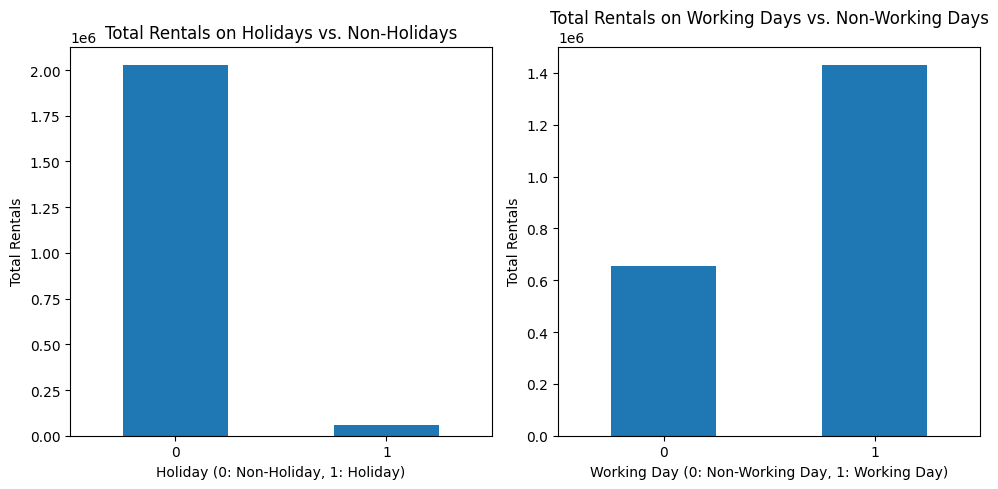

In [ ]:
# Group the data by 'holiday' and 'workingday' and calculate the sum of 'count'
rentals_by_holiday = df.groupby('holiday')['count'].sum()
rentals_by_workingday = df.groupby('workingday')['count'].sum()

# Create a bar chart to compare total rentals on holidays vs. non-holidays
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
rentals_by_holiday.plot(kind='bar', rot=0)
plt.title('Total Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Total Rentals')

# Create a bar chart to compare total rentals on working days vs. non-working days
plt.subplot(1, 2, 2)
rentals_by_workingday.plot(kind='bar', rot=0)
plt.title('Total Rentals on Working Days vs. Non-Working Days')
plt.xlabel('Working Day (0: Non-Working Day, 1: Working Day)')
plt.ylabel('Total Rentals')

plt.tight_layout()
plt.show()


#### Season, Weather

-   `season`
    -   1: spring,
    -   2: summer,
    -   3: fall,
    -   4: winter;
-   `weather`
    -   1: clear, few clouds, scattered clouds
    -   2: mist + cloudy, mist + scattered clouds, mist + few clouds, mist
    -   3: light snow, light rain + thunderstorm + scattered clouds, light rain + scattered 
    clouds
    -   4: heavy rain + ice pallets + thunderstorm + mist, snow + fog

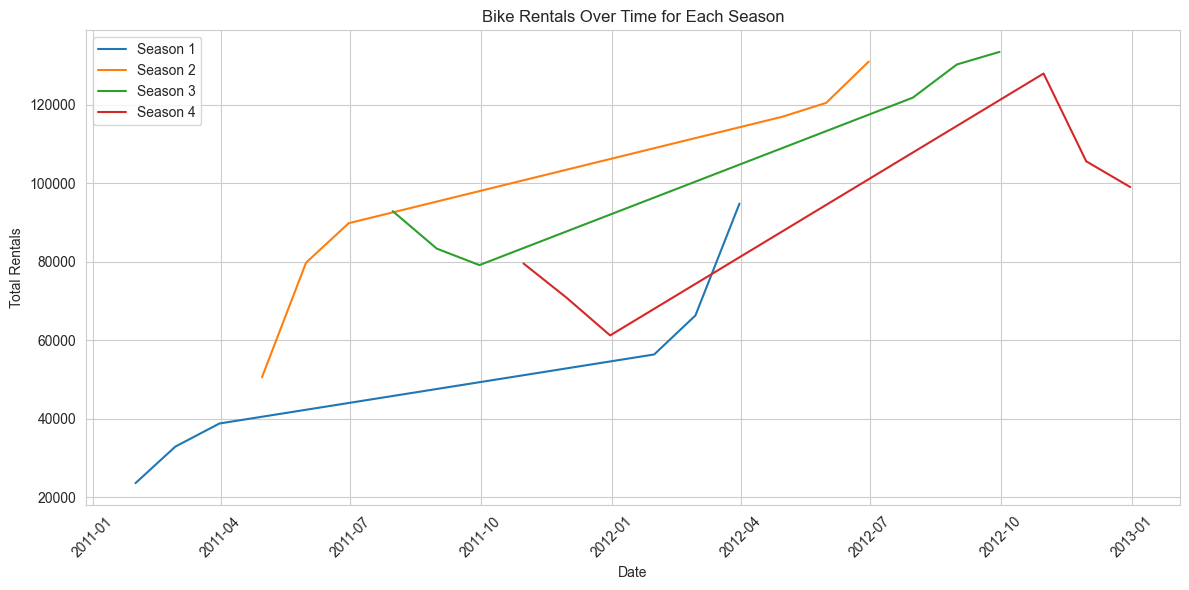

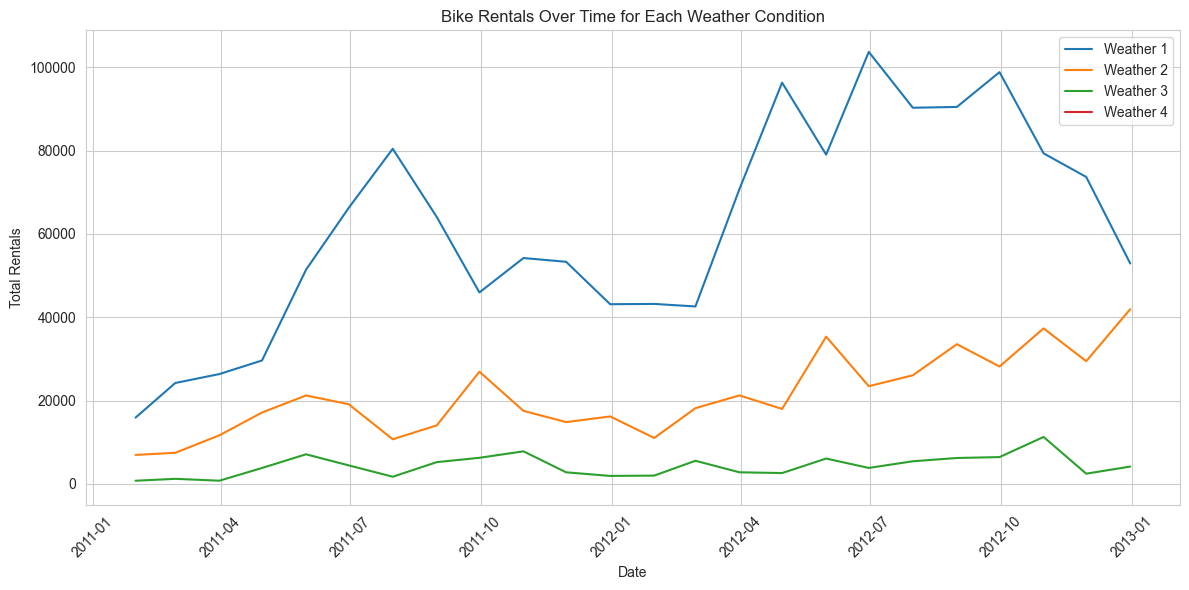

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract 'season' and 'weather' columns for analysis
season_data = df[['datetime', 'season', 'count']]
weather_data = df[['datetime', 'weather', 'count']]

# Create line graphs for bike rentals over time for each season
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Group data by 'season' and calculate the sum of 'count' for each season
season_grouped = season_data.groupby(['season', pd.Grouper(key='datetime', freq='M')])['count'].sum().reset_index()

# Plot the line graphs for each season
for season in season_grouped['season'].unique():
    season_subset = season_grouped[season_grouped['season'] == season]
    plt.plot(season_subset['datetime'], season_subset['count'], label=f'Season {season}')

plt.title('Bike Rentals Over Time for Each Season')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create line graphs for bike rentals over time for each weather condition
plt.figure(figsize=(12, 6))

# Group data by 'weather' and calculate the sum of 'count' for each weather condition
weather_grouped = weather_data.groupby(['weather', pd.Grouper(key='datetime', freq='M')])['count'].sum().reset_index()

# Plot the line graphs for each weather condition
for weather_condition in weather_grouped['weather'].unique():
    weather_subset = weather_grouped[weather_grouped['weather'] == weather_condition]
    plt.plot(weather_subset['datetime'], weather_subset['count'], label=f'Weather {weather_condition}')

plt.title('Bike Rentals Over Time for Each Weather Condition')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


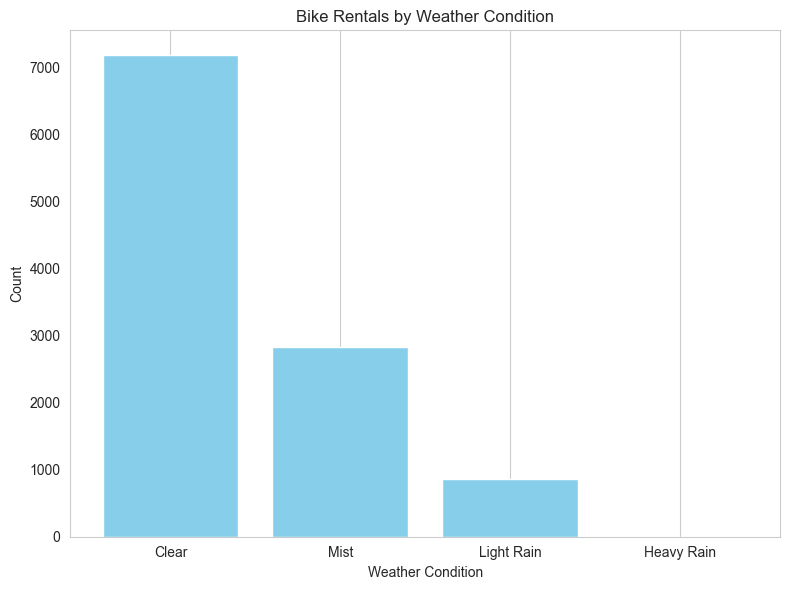

In [ ]:
weather_counts = df['weather'].value_counts().sort_index()
weather_labels = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
plt.figure(figsize=(8, 6))
plt.bar(weather_labels, weather_counts, color='skyblue')
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Temp, Atemp, Humidity, Windspeed

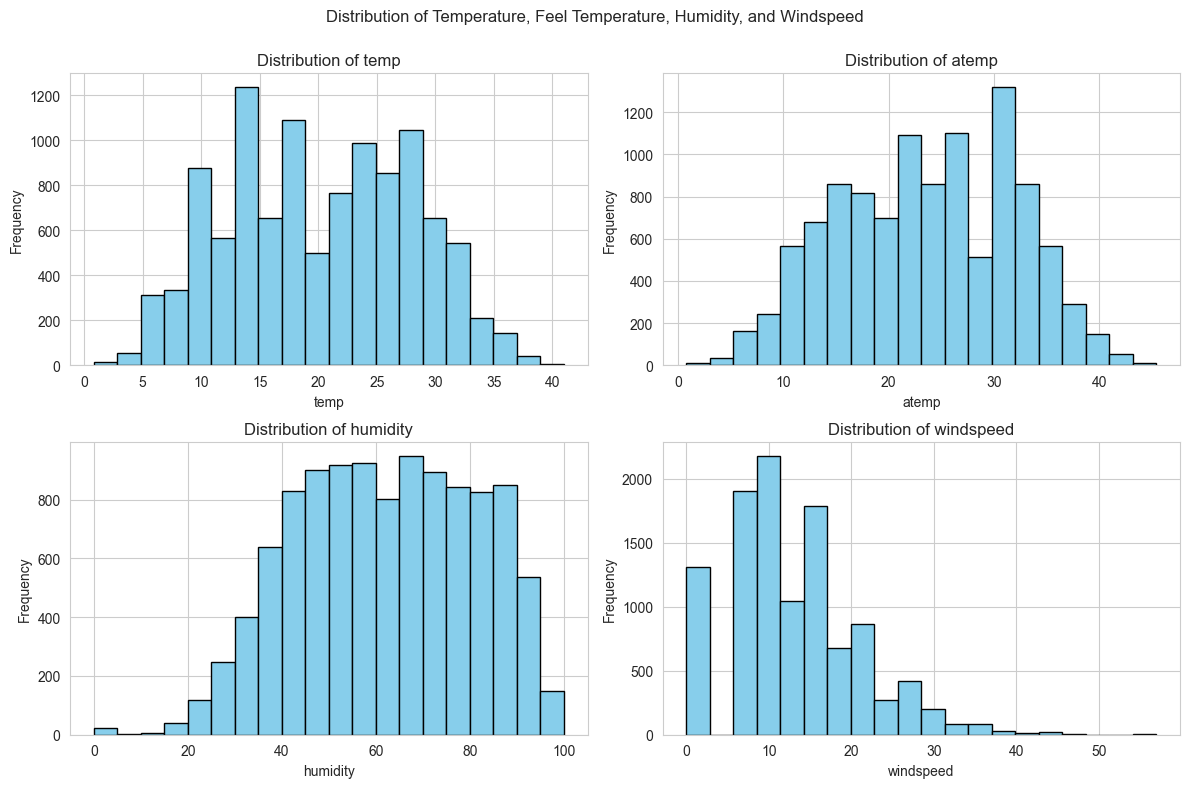

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a DataFrame called 'df'

# Extract the columns of interest for analysis
variables_of_interest = ['temp', 'atemp', 'humidity', 'windspeed']

# Create subplots for histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Distribution of Temperature, Feel Temperature, Humidity, and Windspeed')

# Plot histograms for each variable
for i, variable in enumerate(variables_of_interest):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    ax.hist(df[variable], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Adjust layout and show the histograms
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


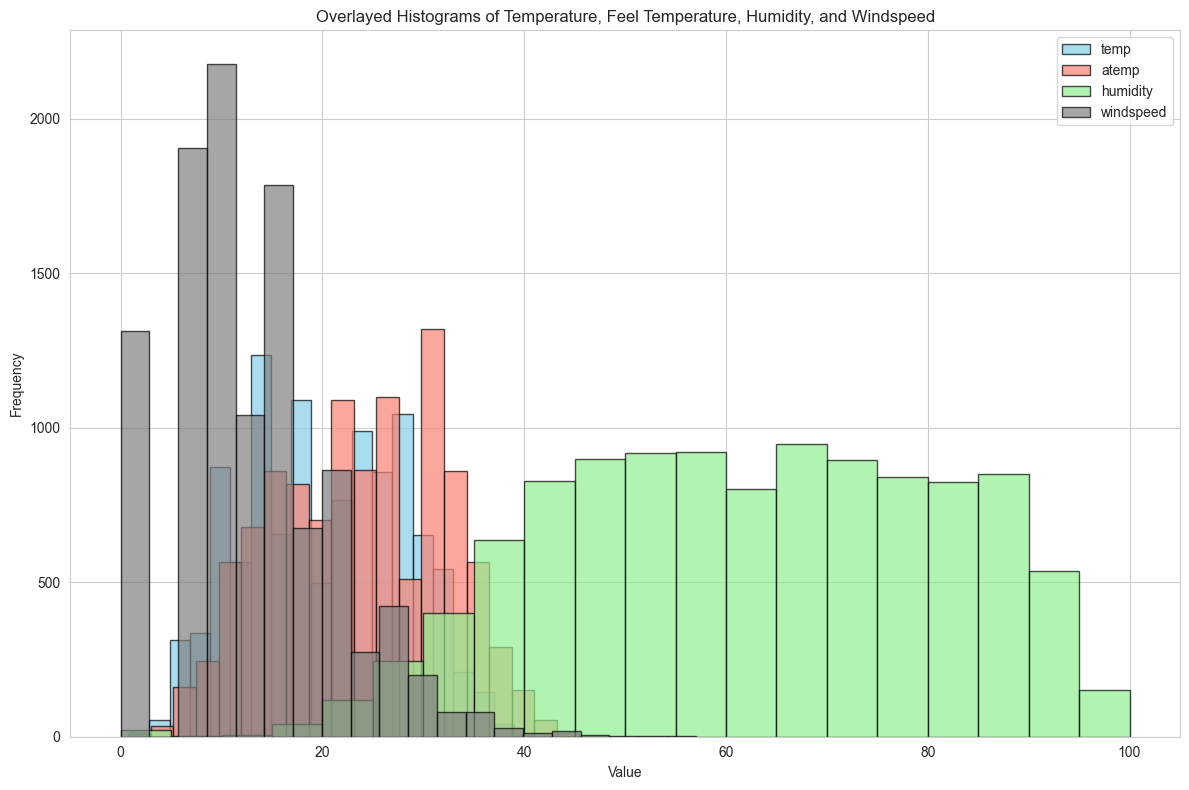

In [ ]:

# Create a figure for the overlaid histograms
plt.figure(figsize=(12, 8))
plt.title('Overlayed Histograms of Temperature, Feel Temperature, Humidity, and Windspeed')

# Set colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

# Plot histograms for each variable with different colors and transparency
for i, variable in enumerate(variables_of_interest):
    if variable == 'windspeed':
        plt.hist(df[variable], bins=20, color='grey', alpha=0.7, label=variable, edgecolor='black')
    else:
        plt.hist(df[variable], bins=20, color=colors[i], alpha=0.7, label=variable, edgecolor='black')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the overlaid histograms
plt.tight_layout()
plt.show()



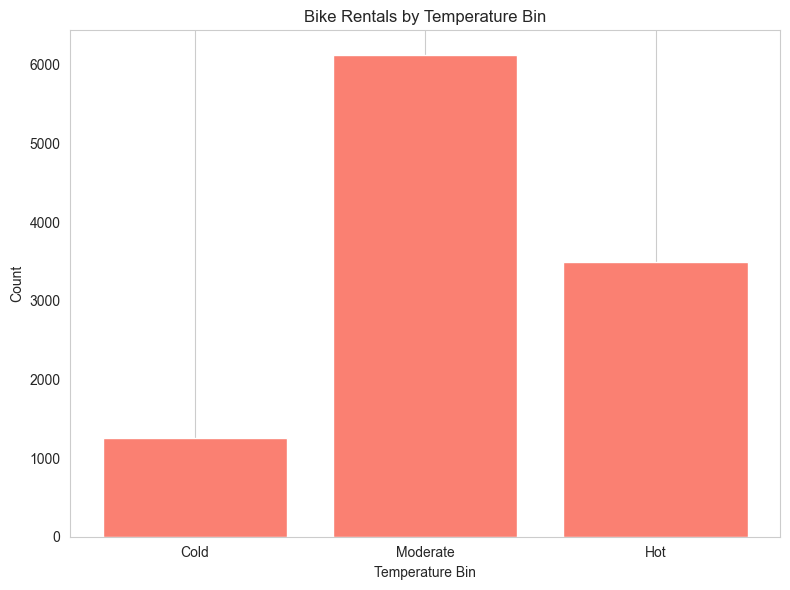

In [ ]:
# Create temperature bins (e.g., cold, moderate, hot)
temperature_bins = [-10, 10, 25, 50]  # Define temperature ranges for the bins
temperature_labels = ['Cold', 'Moderate', 'Hot']
df['temperature_bin'] = pd.cut(df['temp'], bins=temperature_bins, labels=temperature_labels)

# Create a bar chart to visualize bike rentals by temperature bin
temperature_counts = df['temperature_bin'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(temperature_labels, temperature_counts, color='salmon')
plt.title('Bike Rentals by Temperature Bin')
plt.xlabel('Temperature Bin')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


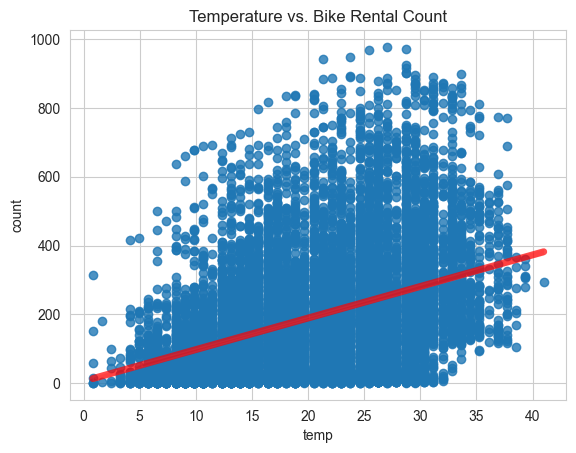

In [ ]:
# Regression plot for 'temp' vs 'count'
sns.regplot(data=df, x='temp', y='count', line_kws={"color":"red","alpha":0.7,"lw":5})
plt.title('Temperature vs. Bike Rental Count')
plt.show()


In [ ]:
df['Weekend'] = df.index.dayofweek // 5
df = df.drop(['temperature_bin', 'avg_temperature'], axis=1)

C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


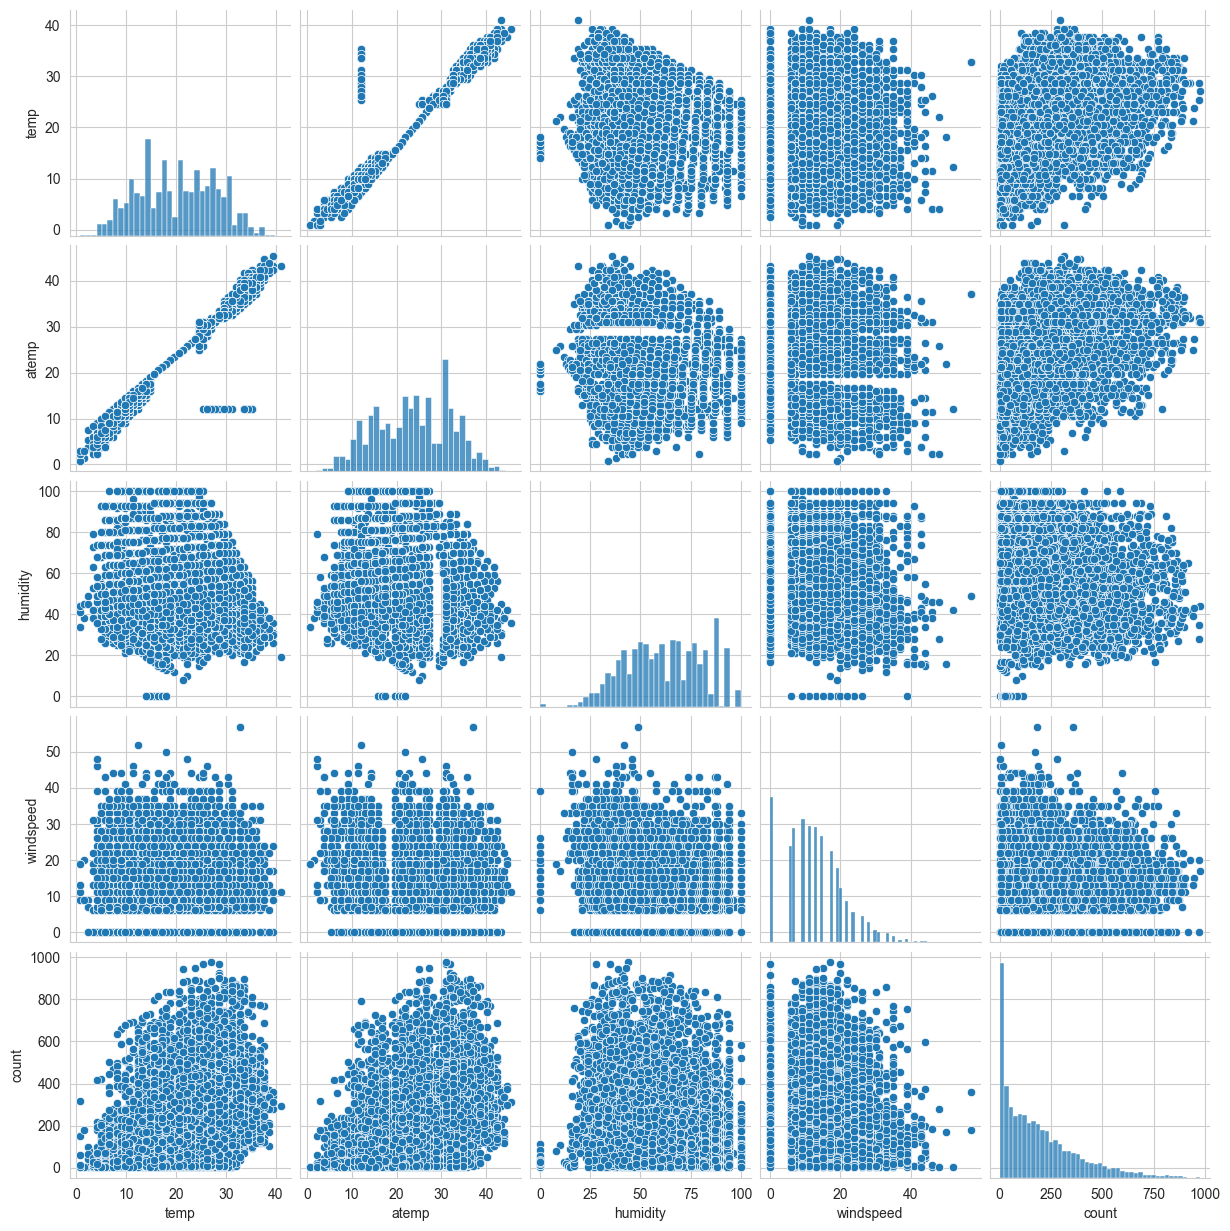

In [ ]:
# Pair plot for selected variables
sns.pairplot(data=df, vars=['temp', 'atemp', 'humidity', 'windspeed', 'count'])
plt.show()


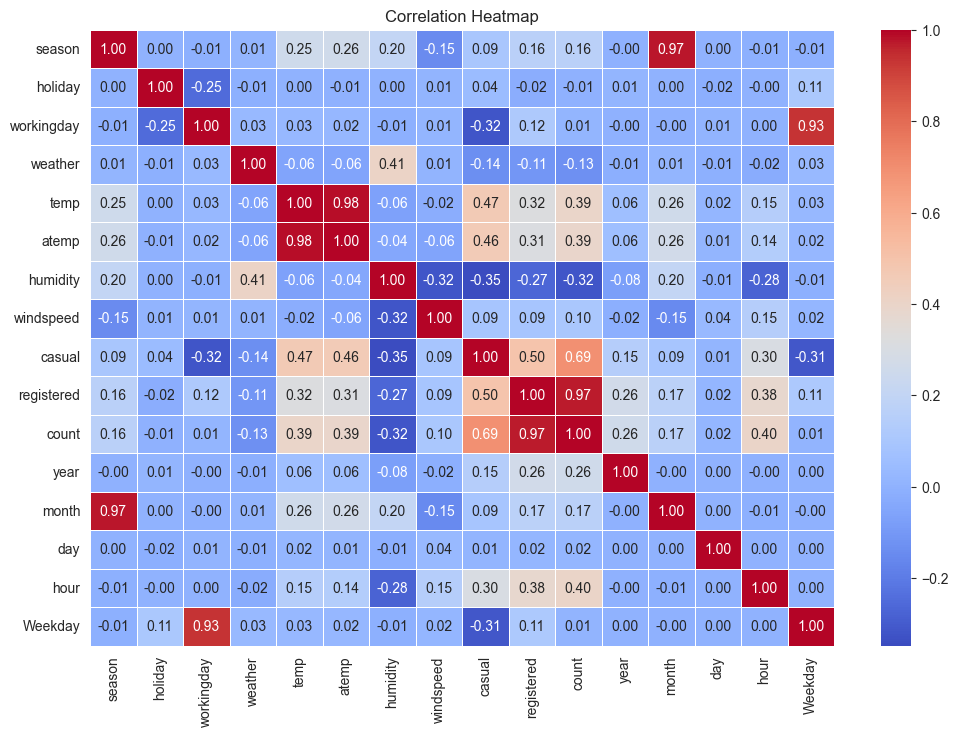

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

1.  Strong Positive Correlations:

    -   `atemp` and `temp` have a near-perfect correlation (0.984948), indicating that these two temperature readings are almost interchangeable in this dataset.
    -   `season` and `month` are also highly correlated (0.974737), which makes sense since seasons are a division of the year.
    -   `registered` and `count` show a very high correlation (0.970948), suggesting that the majority of bike rentals are by registered users rather than casual ones.
    -   `Weekday` and `workingday` are strongly correlated (0.934780), which likely indicates that `workingday` is derived from `Weekday`.
2.  Moderate to High Positive Correlations:

    -   The number of casual rentals has a significant but lesser correlation with `count` (0.690414) than registered rentals, indicating that casual rentals contribute to the total but are not the primary factor.
    -   `registered` and `casual` show a moderate correlation (0.497250), meaning there is some relationship but not as strong, suggesting independent factors may affect these user types.
    -   There's a moderate correlation between temperature (`temp`, `atemp`) and `casual` rentals (around 0.46), implying that warmer temperatures might lead to an increase in casual users renting bikes.
3.  Weather and Environmental Factors:

    -   `weather` and `humidity` have a positive correlation (0.406244), suggesting that adverse weather conditions are often associated with higher humidity levels.
    -   `hour` and `count` have a moderate correlation (0.400601), which indicates that there are certain hours of the day that have consistently higher rental counts.
4.  Low Positive Correlations:

    -   Variables such as `temp`, `atemp`, `registered`, `hour`, `month`, `season`, `windspeed`, `year`, etc., have lower correlations with `count` ranging from 0.1 to 0.4. These correlations, while positive, are less pronounced, meaning these factors have some influence on rental counts, but it's not as significant.
5.  Negative Correlations:

    -   `holiday` has a small negative correlation with `count` (-0.005393), suggesting a slight decrease in rentals on holidays.
    -   `weather` has a negative correlation with `count` (-0.128655), indicating that as weather conditions worsen (weather values increase), bike rentals decrease.
    -   `humidity` shows a negative correlation with `count` (-0.317371), implying that higher humidity levels might deter bike rentals.
6.  Strong Negative Correlations:

    -   `humidity` is negatively correlated with `registered` (-0.265458) and `casual` (-0.348187) rentals. This suggests that as humidity increases, the number of both registered and casual rentals decreases.
    -   `workingday` and `casual` have a strong negative correlation (-0.319111), indicating casual rentals are significantly lower on working days.
7.  Insignificant or Very Low Correlations:

    -   Variables such as `day`, `weather`, `workingday`, `holiday`, and various interactions with `year` show very low to negligible correlations (close to 0), suggesting no strong linear relationship with bike rental counts.

In [ ]:
from scipy import stats

# Define two groups: holiday and non-holiday
holiday_counts = df[df['holiday'] == 1]['count']
non_holiday_counts = df[df['holiday'] == 0]['count']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(holiday_counts, non_holiday_counts)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in bike sharing counts between holidays and non-holidays.")
else:
    print("There is no significant difference in bike sharing counts between holidays and non-holidays.")


There is no significant difference in bike sharing counts between holidays and non-holidays.


In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a model for ANOVA
model = ols('count ~ season', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Extract the p-value from the ANOVA results
p_value = anova_table['PR(>F)'][0]

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in bike sharing counts across different seasons.")
else:
    print("There is no significant difference in bike sharing counts across different seasons.")


There is a significant difference in bike sharing counts across different seasons.


In [ ]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'Weekday', 'Weekend'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Feature selection - choose relevant features for prediction
selected_features = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'hour', 'Weekday', 'weather']

X = df[selected_features]
y = df['count']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 21648.78609492016
R-squared (R2): 0.3441140315647355


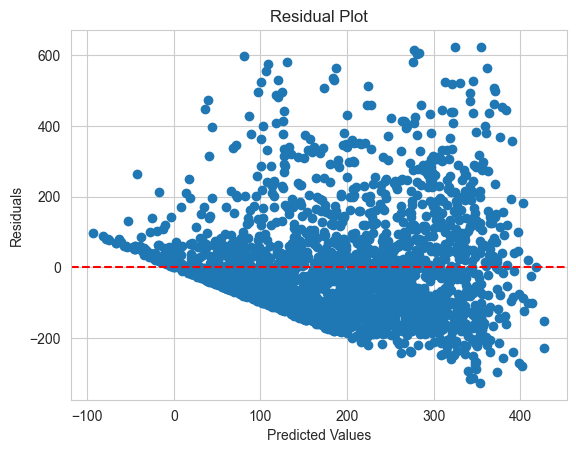

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

# Analyze residuals (to check for patterns or biases)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Mean Squared Error (Random Forest): 5256.919201468776
R-squared (R2) (Random Forest): 0.8407328925361622


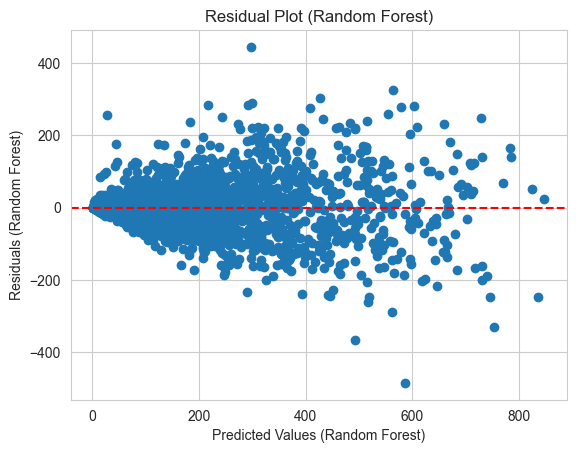

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (R2) (Random Forest): {r2_rf}')

# Analyze residuals (to check for patterns or biases)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf)
plt.xlabel('Predicted Values (Random Forest)')
plt.ylabel('Residuals (Random Forest)')
plt.title('Residual Plot (Random Forest)')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



In [ ]:
# Make predictions on both training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate MSE and R-squared for in-sample (training set)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for out-of-sample (testing set)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("In-sample MSE:", mse_train)
print("In-sample R-squared:", r2_train)
print("Out-of-sample MSE:", mse_test)
print("Out-of-sample R-squared:", r2_test)

In-sample MSE: 755.1494836749581
In-sample R-squared: 0.9769498245352206
Out-of-sample MSE: 5256.919201468776
Out-of-sample R-squared: 0.8407328925361622


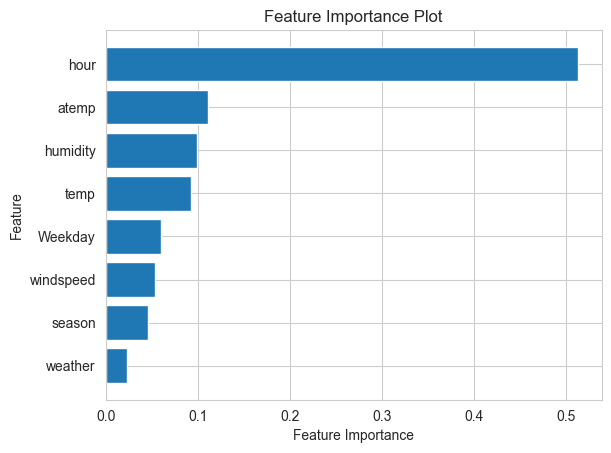

In [ ]:
feature_importances = best_rf_model.feature_importances_
feature_names = selected_features

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
feature_names_sorted = [feature_names[i] for i in sorted_idx]
feature_importances_sorted = [feature_importances[i] for i in sorted_idx]

# Create a bar plot of feature importances
plt.barh(range(len(sorted_idx)), feature_importances_sorted, align='center')
plt.yticks(range(len(sorted_idx)), feature_names_sorted)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_grid, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1
)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
200 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
124 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [ ]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# Train the model on the selected features
best_rf_model.fit(X_train[selected_features], y_train)


RandomForestRegressor(max_features='log2', n_estimators=300, random_state=42)

In [ ]:
# Make predictions on both training and testing sets
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared for in-sample (training set)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for out-of-sample (testing set)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("In-sample MSE:", mse_train)
print("In-sample R-squared:", r2_train)
print("Out-of-sample MSE:", mse_test)
print("Out-of-sample R-squared:", r2_test)


In-sample MSE: 759.926563040255
In-sample R-squared: 0.9768040090113281
Out-of-sample MSE: 5162.918710945191
Out-of-sample R-squared: 0.8435807936836044
